### Name: Arielle Molina

### Student ID: 10737308.

### Group: H

Please fill in you name, student ID and group above, and also edit the filename according to the specified format.

In [3]:
import numpy as np 
import matplotlib.pylab as plt
import scipy
# from pylab import reParams
from sklearn import preprocessing, cross_validation, neighbors, datasets
import pandas as pd
from matplotlib.colors import ListedColormap

C:\Users\armol\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# K-means 


For this assignment the setup will be a little different from the previous weeks. Instead of incrementally writing functions to build the algorithm, it will be up to you to design the code of the algorithm from scratch. The first algorithm we will be covering is *K-means*. The pseudocode from Alpayding for this algorithm (figure 7.3) is:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Repeat
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$
* Until $m_i$ converge

This video by [Andrew on the topic](https://www.youtube.com/watch?v=6u19018FeHg&index=78&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW) might also be helpful to understand what the algorithm does. Again the notation is a little different, but the ideas are exactly the same.

## Implementing the algorithm [10 pts]

For your code, make **functions** for each of the following components of the k-means algorithm:

* Randomly initialize means from the data [1pt]
* Compute the distance between 2 points [1pt]
* Compute the matrix $b$ containing the assignments of points to clusters, based on the current means [2pts]
* Compute the matrix $m$ containing the computed mean vectors, based on the current assignment of clusters [2pts]
* Plot the means (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted) [2pts]
* Determine if the algorithm has converged based on the sets of current and new means [1pt]
* Combine all these functions in a general k-means function [1pt]




## Showing the results [1 pt]

To show your code works, run the algorithm on the Iris dataset using only the last 2 variables of the data. Use a value of 3 for $k$ and plot the means with their assignments. Start by running the algorithm step by step and plotting for each step. Start with the random means and then show at least 2 more steps, to show the means moving as the algorithm iterates. Finally, show the resulting plot where the means have converged and the algorithm has stopped.

In [20]:
iris = datasets.load_iris()
X=(iris.data)
param1 = np.array([X[:, 2]]).T # ULTIMATE WAY TO MAKE MY HANDMADE COLUMN VECTOR!!!!!!! Returns 150x1 
param2 = np.array([X[:, 3]]).T
XX = np.concatenate((param1, param2),1)  # NICE WAY TO PASTE TWO COLUMN WITH SAME DIM NEXT TO EACH OTHER! RETURNS 150 X 2
data = XX       
F = data.shape[1]
N = data.shape[0]
K = 3

initial plot with initial means!


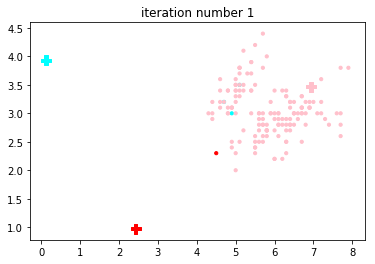

C:\Users\armol\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


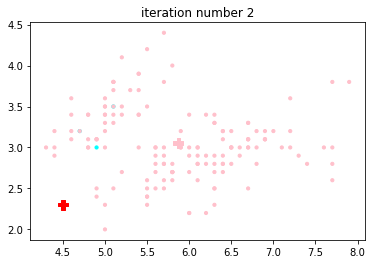

previous mean array: 
 [[ 0.12074209  3.9319217 ]
 [ 2.42715103  0.97511776]
 [ 6.94220191  3.46669549]] 
 actual mean array: 
 [[        nan         nan]
 [ 4.5         2.3       ]
 [ 5.87191781  3.05547945]]

 iterations before error :  2

 READ PLZ!!!!!!!!!! 
: this error happens because during the random initialization of the mean array, one mean was assignned too far away from any data point
 such that no data point actually belonged to the cluster, which results in an infinite number when you try to calculate the mean position 
of the cluster (someting divided by zero is simply infinity


In [13]:
def initialize_m(K, F) :
    m = np.random.rand(K, F) 
    while (True) :
        # F = data.shape[1] # F is amount of features/dimensions
        m = np.random.rand(K, F) 
        for f in range (F) :
            m[:, f] = m[:, f] * np.amax(data[:, f])
        # find a way to scale m to real values of dataset
        if not np.isnan(m).all() :
            break
    return m

def euc_dist(b, a) :
    return np.linalg.norm(b - a)

def matrix_b (K, matrix_m) :
    #N = X.shape[0]
    distances = np.zeros((N, K))
    b = np.zeros((N, K))
    colour_index = np.zeros(N, dtype = np.int)
    for t in range (K, N) :
        # calculate distances of one X point to every mean
        for i in range (K) :            
            distances[t, i] = euc_dist(data[t, :], matrix_m[i, :])
        # only the the cluster that is most nearby Xpoint receives nonzero b. c takes values 0, 1, 2
        c = np.argmin(distances[t, :])
        b[t, c] = 1
        colour_index[t] = c
    return b, colour_index 
              
def matrix_m (K, b_matrix) :
    #numerator = np.zeros((F, 1))
    m = np.zeros((K,F))
    for i in range (K) :
        numerator = np.zeros((1, F))
        for t in range (N) :
            b = b_matrix[:, i]
            if b[t] == 1 :
                numerator = numerator + data[t, :]
        m[i, :] = numerator / np.sum(b)
    return m

def plot_everything(b_matrix, colour_index, m_matrix, iteration) :
    colour_map = {0 : 'cyan', 1 : 'red', 2 : 'pink'}
    data_colours = [ colour_map[colour_index[t]] for t in range(N) ]
    plt.scatter(m_matrix[:, 0], m_matrix[:, 1], c = ['cyan', 'red', 'pink'], s = 100, marker = "P")
    plt.scatter(data[:, 0], data[:, 1], c = data_colours, s = 10)
    plt.title("iteration number {}".format(iteration))
    plt.show()
    return

def k_means() :
    mean_matrix = initialize_m(K, F) 
    count = 1
    while  (True) :
        # Compute distances between cluster centroids and data points and then assign cluster to every data point
        if count > 1 :
            b_prev = b
            colour_indexes_prev = colour_indexes
        b, colour_indexes = matrix_b(K, mean_matrix)
        converge = mean_matrix
        if count == 1 :
            print("initial plot with initial means!")
            plot_everything(b, colour_indexes, converge, count)
        mean_matrix = matrix_m(K, b)
        count += 1
        plot_everything(b, colour_indexes, mean_matrix, count)
        if np.allclose (mean_matrix, converge, equal_nan = True ) :
            print ("previous mean array: \n", converge, "\n actual mean array: \n", mean_matrix)
            print("iterations until convergence : ", count)
            plot_everything(b, colour_indexes, mean_matrix, count)
            print("the last two plots are almost identical! ")
            return
        elif np.isnan(mean_matrix).any() :
            print ("previous mean array: \n", converge, "\n actual mean array: \n", mean_matrix)
            print("\n iterations before error : ", count)
            print("\n READ PLZ!!!!!!!!!! \n: this error happens because during the random initialization of the mean array, one mean was assignned too far away from any data point", end = '')
            print("\n such that no data point actually belonged to the cluster, which results in an infinite number when you try to calculate the mean position \nof the cluster (someting divided by zero is simply infinity")          #plot_everything(b, colour_indexes, converge)
            return        

k_means()   

## Elbow Method [4 pts]

For this dataset we have the benefit of already knowing the number of clusters. However, there are even some things we can do if the number clusters is not known or set before hand. One possbile approach is the *elbow method*. Watch the video from Andrew on the topic below or find another resource describing it.

[Choosing the number of clusters?](https://www.youtube.com/watch?v=izCbbMbRWHw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=81)

Now extend your implementation to include the following:

* Create a sensible cost function using the data and the current values of $b$ and $m$, that steps of the algorithm will minimize. [1 pt]
* Create a function to compute the converged cost of a specific value of $k$ repeatedly and averaging this. [1 pt]
* Running your code many times will most likely result in an error in your `compute_means` function at some point. Find out what is causing the error and create a new version of `compute_means` that solves this problem in some sensible way. [1 pts]
* Compute the average cost for k values $1$ to $10$ and combine them in a plot. Briefly discuss if this plot corresponds with your expectations. [1 pt]


mean matrix for clusters 1 [550.64346666666665]
mean matrix for clusters 2 [550.64346666666665, 86.403945335710034]
mean matrix for clusters 3 [550.64346666666665, 86.403945335710034, 31.387758974358981]
mean matrix for clusters 4 [550.64346666666665, 86.403945335710034, 31.387758974358981, 86.403945335710034]
mean matrix for clusters 5 [550.64346666666665, 86.403945335710034, 31.387758974358981, 86.403945335710034, 31.429285668276975]
mean matrix for clusters 6 [550.64346666666665, 86.403945335710034, 31.387758974358981, 86.403945335710034, 31.429285668276975, 18.811416576563964]
mean matrix for clusters 7 [550.64346666666665, 86.403945335710034, 31.387758974358981, 86.403945335710034, 31.429285668276975, 18.811416576563964, 30.575549450549453]
mean matrix for clusters 8 [550.64346666666665, 86.403945335710034, 31.387758974358981, 86.403945335710034, 31.429285668276975, 18.811416576563964, 30.575549450549453, 20.316007803485398]
mean matrix for clusters 9 [550.64346666666665, 86.40394

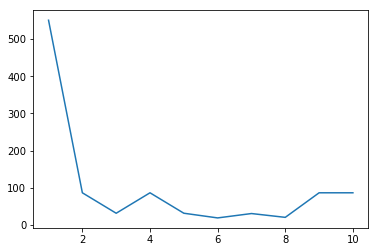

In [22]:
data = XX
N = data.shape[0]
F = data.shape[1]
#K = 2
#matrix_m = initialize_m()
def initialize_m_new(K) :
    m = np.random.rand(K, F) 
    while (True) :
        # F = data.shape[1] # F is amount of features/dimensions
        m = np.random.rand(K, F) 
        for f in range (F) :
            m[:, f] = m[:, f] * np.amax(data[:, f])
        # find a way to scale m to real values of dataset
        if not np.isnan(m).all() :
            break
    return m

# adapt the b function to output the euclidean distances squared! 
def matrix_b_new (K, matrix_m) :
    #somebiszero = True
    #while somebiszero :
        #N = X.shape[0]
    distances = np.zeros((N, K))
    b = np.zeros((N, K))
    colour_index = np.zeros(N, dtype = np.int)
    for t in range (N) :
        # calculate distances of one X point to every mean
        for i in range (K) :            
            distances[t, i] = euc_dist(data[t, :], matrix_m[i, :])
        # only the the cluster that is most nearby Xpoint receives nonzero b. c takes values 0, 1, 2
        c = np.argmin(distances[t, :])
        b[t, c] = 1
        #colour_index[t] = c
    check = np.sum(b, axis = 0)
        #print("check sum of b's ",check)
        #if not 0 in check :
         #   somebiszero = False
    return b, np.square(distances)
    #matrix_b, squared_dist = matrix_b_new(2, matrix_m)
    #print(squared_dist)

def matrix_m_new(K, b_matrix) :
    #numerator = np.zeros((F, 1))
    m = np.zeros((K,F))
    for i in range (K) :
        numerator = np.zeros((1, F))
        for t in range (N) :
            b = b_matrix[:, i]
            if b[t] == 1 :
                numerator = numerator + data[t, :]
        if np.sum(b) == 0 :
            return m
        m[i, :] = numerator / np.sum(b)
    return m

def compute_cost(matrix_b, squared_dist) :
    thing = matrix_b*squared_dist
    return np.sum(np.sum(thing), axis = 0)

def k_means_new(K) :
    #N = data.shape[0]
    #F = data.shape[1]    
    mean_matrix = initialize_m_new(K) 
    count = 1
    while  (True) :
        # Compute distances between cluster centroids and data points and then assign cluster to every data point
        if count > 1 :
            b_prev = b
            squared_distances_prev = squared_distances
            
        converge = mean_matrix    
        b, squared_distances = matrix_b_new(K, mean_matrix)
        
        if count == 1 and np.count_nonzero(b ) == 0 :
            #print("nan init for cluster", K, "whit mean", mean_matrix)
            while True :
                converge = initialize_m_new(K)
                b, sqd = matrix_b_new(K, converge)
                #mean_matrix = matrix_m_new(K, b)
                check = np.sum(b, axis = 0)
                if np.count_nonzero(check) == 0 :      
                    break   
                    
        mean_matrix = matrix_m_new(K, b)
        count += 1
        if np.allclose (mean_matrix, converge, equal_nan = True ) :
            #print('amount of clusters: ', K)
            #print ("previous mean array: \n", converge, "\n actual mean array: \n", mean_matrix)
            #print("iterations until convergence : ", count)
            return mean_matrix
        
        elif np.isnan(mean_matrix).any() :
            #print ("previous mean array: \n", converge, "\n actual mean array: \n", mean_matrix)
            print("\n iterations before error : ", count)
            return mean_matrix

def all_costs(somenumber) :
    costs = []
    kk = range(1, somenumber)
    for i  in kk :
        matrix_b, squared_dist = matrix_b_new(i, k_means_new(i))
        costs.append(compute_cost(matrix_b, squared_dist))
        print("mean matrix for clusters", i, costs)
    return kk, costs

#costs = all_costs(10) 
#print(costs[1])
# plt.plot(costs[0], costs[1])
# plt.show()


def elbow_method(k) :
    costs = all_costs(k)
    plt.plot(costs[0], costs[1])
    plt.show()
    return

elbow_method(11) #for k from 1 to 10

## kNN [5 pts]

The final algorithm of this week is kNN, the quintessential non-parametric classification algorithm. To implement this you may use any resource on the algorithm you prefer, be it the description in the sides, in *Alpaydin*, a video on the topic or some other content you found. The division of functions entirely up to you as well, you will only be scored on the following components being present:

* A functioning implementation of kNN [2 pts]
* A version of kNN that weights the contribution of k datapoints based on distance to the point being evaluated [1 pt]
* A sufficient documentation of your functions and the choices you made in your design [1 pt]
* A structured comparision of the 2 algorithms using different values of K on the Iris dataset [1 pt]

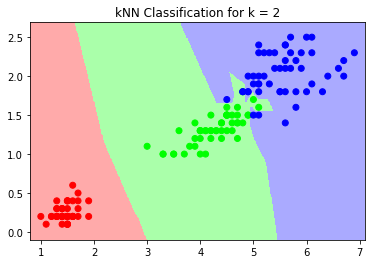

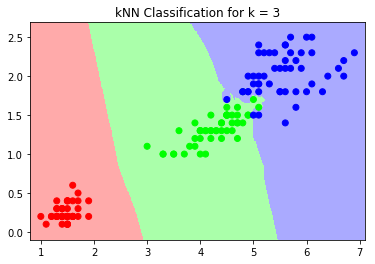

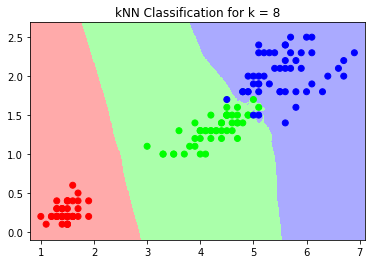

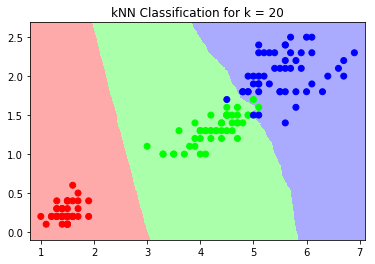

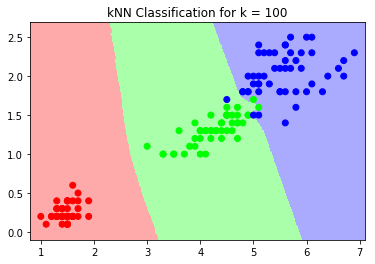

In [21]:
def kNN(data, K, real_targets) :
    #To distinguish the already classified X from all other 'to be assigned' points in the grid
    bold_colors = ListedColormap(['#FF0000', '#00FF00', '#0000FF']) 
    light_colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

    #Creating all 'to be assigned' points in a meshgrid
    x_min, x_max = data[:, 0].min() - 0.2 , data[:, 0].max() + 0.2
    y_min, y_max = data[:, 1].min() - 0.2 , data[:, 1].max() + 0.2
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    for i in range(len(K)) :
        classification = neighbors.KNeighborsClassifier(K[i], weights='distance')
        classification.fit(data, real_targets)
        prediction = classification.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
        prediction = prediction.reshape(x_mesh.shape)
        #plt.figure()
        plt.pcolormesh(x_mesh, y_mesh, prediction, cmap = light_colors)
        plt.scatter(XX[:, 0], XX[:, 1], c=real_targets, cmap = bold_colors)
        plt.title('kNN Classification for k = {}'.format(K[i]))      
        plt.show()
    return


kNN(data, (2, 3, 8, 20, 100), iris.target)

TypeError: 'tuple' object cannot be interpreted as an integer